In [8]:
pip install prophet 

Defaulting to user installation because normal site-packages is not writeable
  Using cached holidays-0.57-py3-none-any.whl.metadata (26 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 30.9 MB/s eta 0:00:000:00:0136m0:00:01
Using cached holidays-0.57-py3-none-any.whl (1.1 MB)
Using cached tqdm-4.66.5-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('monthly-car-sales.csv')

In [107]:
df


,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [108]:
df.dtypes

Month    object
Sales     int64
dtype: object

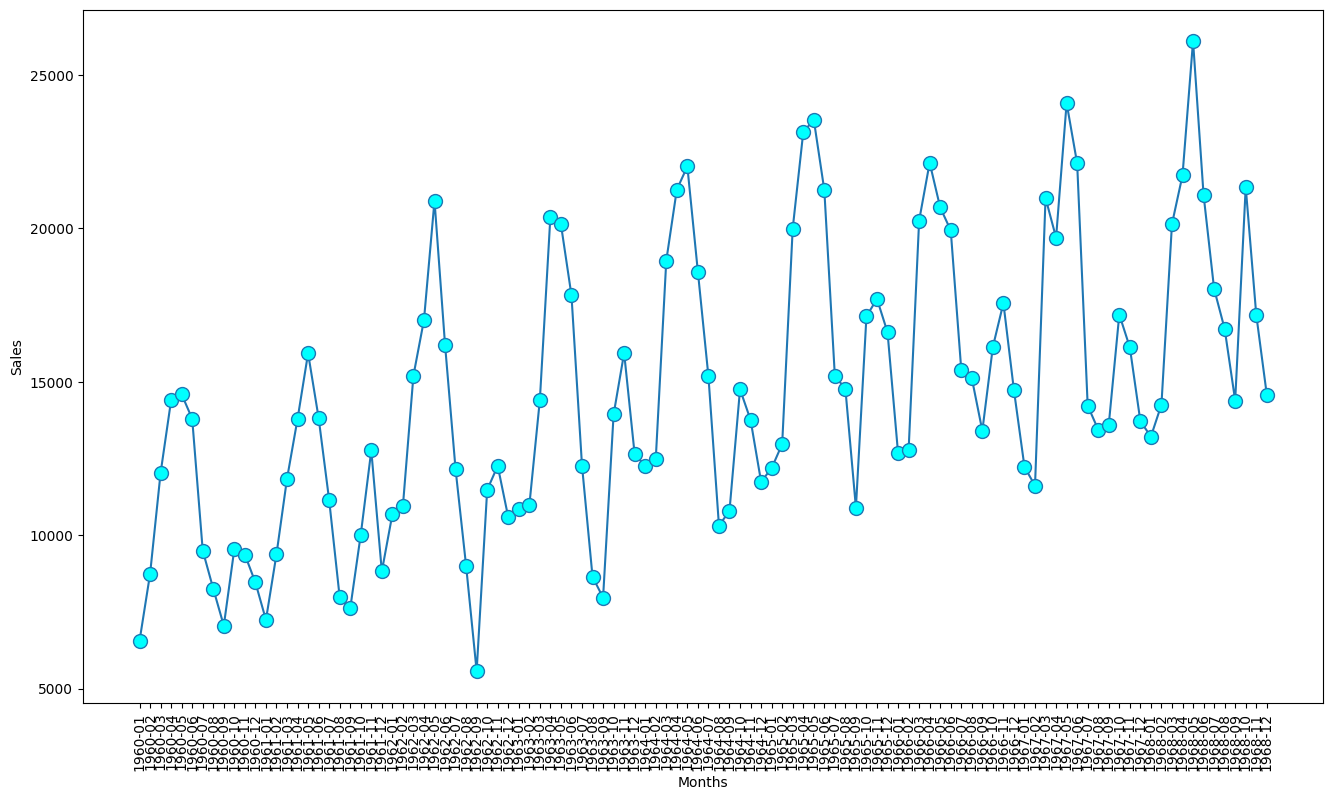

In [109]:
plt.figure(figsize=(16,9))
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks(rotation='vertical')
plt.plot(df['Month'], df['Sales'], marker = 'o', mfc='cyan', ms=10)

In [110]:
df.columns

Index(['Month', 'Sales'], dtype='object')

In [111]:
df.columns = ['ds','y']

In [112]:
df.columns

Index(['ds', 'y'], dtype='object')

In [113]:
df

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [114]:
df['ds']=pd.to_datetime(df['ds'])

In [115]:
df

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180


In [116]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [117]:
df.iloc[4,0]

Timestamp('1960-05-01 00:00:00')

In [118]:
import time

In [119]:
time.time()

1727761143.6092257

In [120]:
time.asctime()

'Tue Oct  1 11:09:04 2024'

In [121]:
time.localtime()

time.struct_time(tm_year=2024, tm_mon=10, tm_mday=1, tm_hour=11, tm_min=9, tm_sec=4, tm_wday=1, tm_yday=275, tm_isdst=0)

##### Build the Model

In [122]:
from prophet import Prophet

In [123]:
model = Prophet(weekly_seasonality=True, daily_seasonality=True)

In [124]:
model.fit(df)

11:09:06 - cmdstanpy - INFO - Chain [1] start processing
11:09:06 - cmdstanpy - INFO - Chain [1] done processing


In [125]:
# Define the period for which we want a prediction
future = list()
for i in range(1,13):
    date = '1969-%02d' % i
    future.append([date])

for i in range(1,13):
    date = '1970-%02d' % i
    future.append([date])

for i in range(1,13):
    date = '1971-%02d' % i
    future.append([date])

In [126]:
future

[['1969-01'],
 ['1969-02'],
 ['1969-03'],
 ['1969-04'],
 ['1969-05'],
 ['1969-06'],
 ['1969-07'],
 ['1969-08'],
 ['1969-09'],
 ['1969-10'],
 ['1969-11'],
 ['1969-12'],
 ['1970-01'],
 ['1970-02'],
 ['1970-03'],
 ['1970-04'],
 ['1970-05'],
 ['1970-06'],
 ['1970-07'],
 ['1970-08'],
 ['1970-09'],
 ['1970-10'],
 ['1970-11'],
 ['1970-12'],
 ['1971-01'],
 ['1971-02'],
 ['1971-03'],
 ['1971-04'],
 ['1971-05'],
 ['1971-06'],
 ['1971-07'],
 ['1971-08'],
 ['1971-09'],
 ['1971-10'],
 ['1971-11'],
 ['1971-12']]

In [127]:
future = pd.DataFrame(future, columns=['ds'])

In [128]:
future

,ds
0,1969-01
1,1969-02
2,1969-03
3,1969-04
4,1969-05
5,1969-06
6,1969-07
7,1969-08
8,1969-09
9,1969-10


In [129]:
forecast= model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1969-01-01,16107.318303,14600.581971,17558.241084,16107.165092,16107.513831,-8.375151,-8.375151,-8.375151,2484.917109,...,296.397039,296.397039,296.397039,-2789.689298,-2789.689298,-2789.689298,0.0,0.0,0.0,16098.943152
1,1969-02-01,16166.374341,13321.107903,16491.607339,16165.195731,16167.682427,-1208.370955,-1208.370955,-1208.370955,2484.917109,...,-897.810967,-897.810967,-897.810967,-2795.477096,-2795.477096,-2795.477096,0.0,0.0,0.0,14958.003386
2,1969-03-01,16219.715278,18984.939852,21884.977766,16217.108478,16222.767147,4199.686993,4199.686993,4199.686993,2484.917109,...,-897.810967,-897.810967,-897.810967,2612.580852,2612.580852,2612.580852,0.0,0.0,0.0,20419.402272
3,1969-04-01,16278.771316,22590.464364,25553.525232,16274.004304,16284.468162,7817.877892,7817.877892,7817.877892,2484.917109,...,447.964727,447.964727,447.964727,4884.996057,4884.996057,4884.996057,0.0,0.0,0.0,24096.649209
4,1969-05-01,16335.922321,23813.550902,27022.758964,16328.880140,16343.760898,9081.895187,9081.895187,9081.895187,2484.917109,...,264.051935,264.051935,264.051935,6332.926143,6332.926143,6332.926143,0.0,0.0,0.0,25417.817508
5,1969-06-01,16394.978359,20369.207399,23295.183135,16384.948536,16406.104058,5425.694281,5425.694281,5425.694281,2484.917109,...,-497.106274,-497.106274,-497.106274,3437.883446,3437.883446,3437.883446,0.0,0.0,0.0,21820.672640
6,1969-07-01,16452.129364,16981.936891,19961.831098,16439.279060,16466.270386,2081.604266,2081.604266,2081.604266,2484.917109,...,447.964727,447.964727,447.964727,-851.277569,-851.277569,-851.277569,0.0,0.0,0.0,18533.733630
7,1969-08-01,16511.185402,14374.234810,17222.443060,16494.810069,16528.975516,-792.476034,-792.476034,-792.476034,2484.917109,...,-56.785647,-56.785647,-56.785647,-3220.607496,-3220.607496,-3220.607496,0.0,0.0,0.0,15718.709368
8,1969-09-01,16570.241440,13400.809537,16420.754527,16550.686772,16592.874744,-1727.413045,-1727.413045,-1727.413045,2484.917109,...,443.289188,443.289188,443.289188,-4655.619341,-4655.619341,-4655.619341,0.0,0.0,0.0,14842.828395
9,1969-10-01,16627.392444,17762.467172,20748.588202,16603.385556,16654.116305,2610.780740,2610.780740,2610.780740,2484.917109,...,296.397039,296.397039,296.397039,-170.533408,-170.533408,-170.533408,0.0,0.0,0.0,19238.173184


In [130]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [131]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1969-01-01,16098.943152,14600.581971,17558.241084
1,1969-02-01,14958.003386,13321.107903,16491.607339
2,1969-03-01,20419.402272,18984.939852,21884.977766
3,1969-04-01,24096.649209,22590.464364,25553.525232
4,1969-05-01,25417.817508,23813.550902,27022.758964
5,1969-06-01,21820.672640,20369.207399,23295.183135
6,1969-07-01,18533.733630,16981.936891,19961.831098
7,1969-08-01,15718.709368,14374.234810,17222.443060
8,1969-09-01,14842.828395,13400.809537,16420.754527
9,1969-10-01,19238.173184,17762.467172,20748.588202


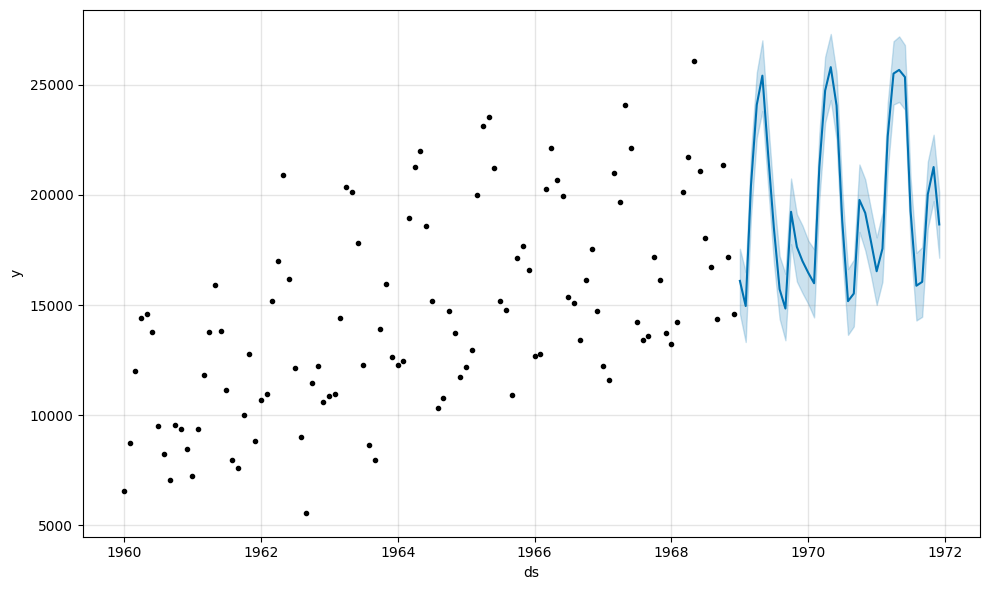

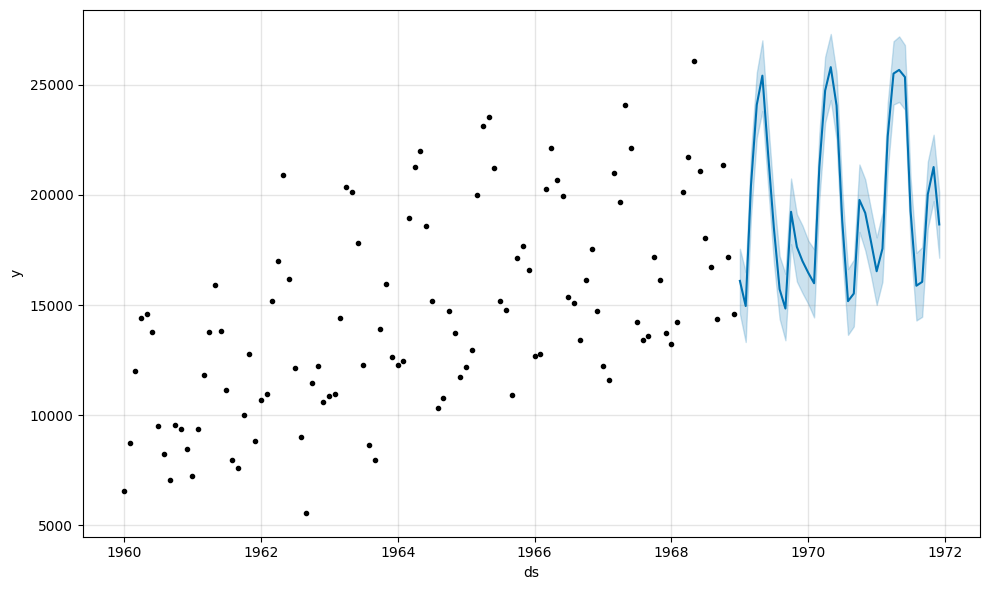

In [132]:
model.plot(forecast)

In [133]:
new= forecast[['ds','yhat']]
new

,ds,yhat
0,1969-01-01,16098.943152
1,1969-02-01,14958.003386
2,1969-03-01,20419.402272
3,1969-04-01,24096.649209
4,1969-05-01,25417.817508
5,1969-06-01,21820.672640
6,1969-07-01,18533.733630
7,1969-08-01,15718.709368
8,1969-09-01,14842.828395
9,1969-10-01,19238.173184


<function matplotlib.pyplot.legend(*args, **kwargs)>

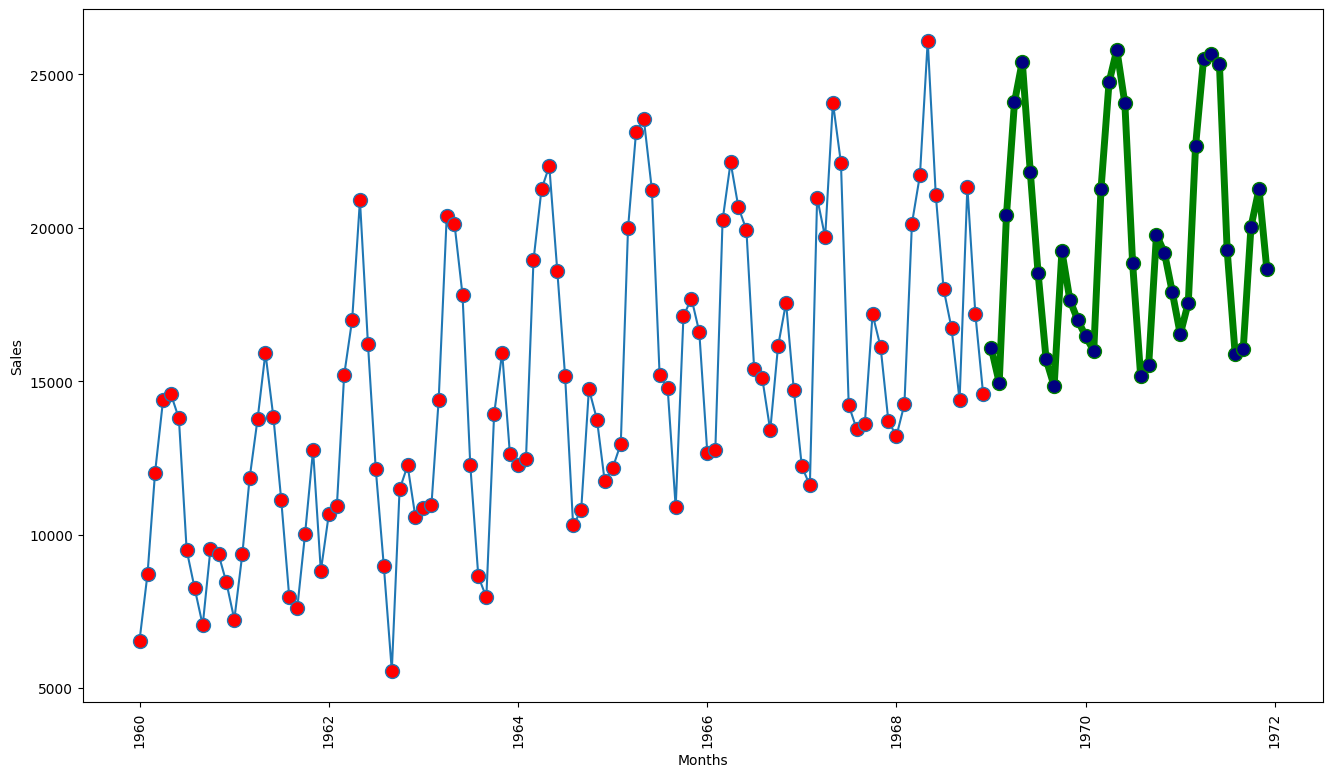

In [134]:
plt.figure(figsize=(16,9))
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks(rotation='vertical')
plt.plot(df['ds'], df['y'], marker = 'o', mfc='red', ms=10, label='previous trend')
plt.plot(new['ds'],new['yhat'],label='forecasted',marker='o', color='g',mfc='navy',ms=10,lw=5)
plt.legend

In [136]:
df= pd.read_csv('sealevel.csv')

In [138]:
df

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21
...,...,...,...,...,...,...,...,...,...
1043,2021,334929.31,49.26,85.01,49.78,56.17,84.76,56.69,60.49
1044,2021,338042.09,50.49,85.94,49.66,57.42,85.65,56.57,60.56
1045,2021,337369.81,49.65,84.02,49.58,56.57,83.78,56.50,60.53
1046,2021,335464.09,47.46,82.66,49.54,54.41,82.45,56.46,60.36


In [196]:
df['Year'].value_counts()

Year
1970-01-01 00:00:00.000000000    36
1969-12-31 23:59:59.999999977    27
1969-12-31 23:59:59.999999976    24
1969-12-31 23:59:59.999999998    23
1970-01-01 00:00:00.000000003    22
                                 ..
1969-12-31 23:59:59.999999960     2
1969-12-31 23:59:59.999999956     1
1969-12-31 23:59:59.999999961     1
1969-12-31 23:59:59.999999958     1
1970-01-01 00:00:00.000000054     1
Name: count, Length: 101, dtype: int64

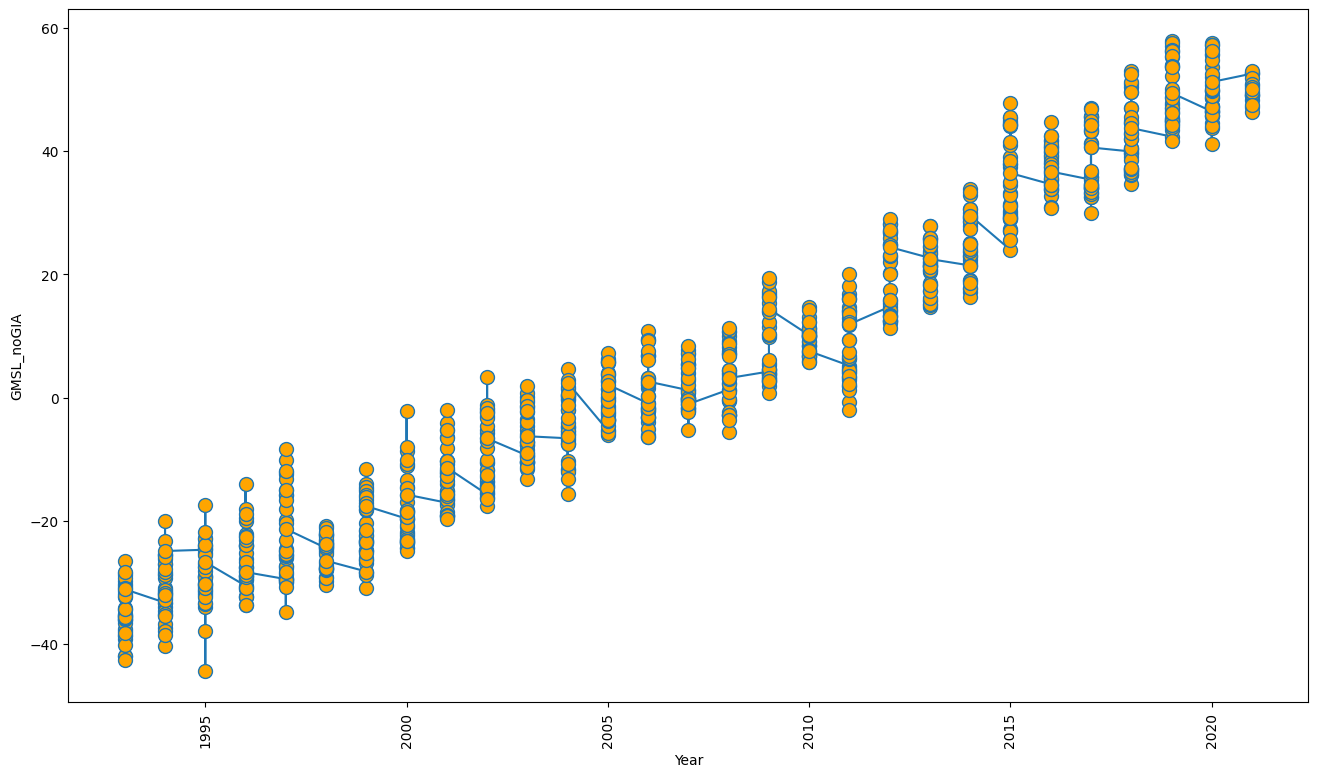

In [142]:
plt.figure(figsize=(16,9))
plt.xlabel('Year')
plt.ylabel('GMSL_noGIA')
plt.xticks(rotation='vertical')
plt.plot(df['Year'], df['GMSL_noGIA'], marker = 'o', mfc='orange', ms=10)

In [143]:
df.columns

Index(['Year', 'TotalWeightedObservations', 'GMSL_noGIA', 'StdDevGMSL_noGIA',
       'SmoothedGSML_noGIA', 'GMSL_GIA', 'StdDevGMSL_GIA', 'SmoothedGSML_GIA',
       'SmoothedGSML_GIA_sigremoved'],
      dtype='object')

In [182]:
df['ds']=pd.to_datetime(df['Year'])
df['y']=pd.to_datetime(df['GMSL_noGIA'])

In [183]:
df.dtypes

Year                           datetime64[ns]
TotalWeightedObservations             float64
GMSL_noGIA                            float64
StdDevGMSL_noGIA                      float64
SmoothedGSML_noGIA                    float64
GMSL_GIA                              float64
StdDevGMSL_GIA                        float64
SmoothedGSML_GIA                      float64
SmoothedGSML_GIA_sigremoved           float64
ds                             datetime64[ns]
y                              datetime64[ns]
dtype: object

In [184]:
import time

In [185]:
from prophet import Prophet

In [186]:
model = Prophet(weekly_seasonality=True, daily_seasonality=True)

In [187]:
model.fit(df)

11:29:05 - cmdstanpy - INFO - Chain [1] start processing
11:29:05 - cmdstanpy - INFO - Chain [1] done processing


In [188]:
future = list()
for i in range(1,13):
    date = '2021-%02d' % i
    future.append([date])
for i in range(1,13):
    date = '2022-%02d' % i
    future.append([date])

for i in range(1,13):
    date = '2023-%02d' % i
    future.append([date])

for i in range(1,13):
    date = '2024-%02d' % i
    future.append([date])

for i in range(1,13):
    date = '2025-%02d' % i
    future.append([date])

for i in range(1,13):
    date = '2026-%02d' % i
    future.append([date])

for i in range(1,13):
    date = '2027-%02d' % i
    future.append([date])

for i in range(1,13):
    date = '2028-%02d' % i
    future.append([date])

for i in range(1,13):
    date = '2029-%02d' % i
    future.append([date])

for i in range(1,13):
    date = '2030-%02d' % i
    future.append([date])

In [189]:
future

[['2021-01'],
 ['2021-02'],
 ['2021-03'],
 ['2021-04'],
 ['2021-05'],
 ['2021-06'],
 ['2021-07'],
 ['2021-08'],
 ['2021-09'],
 ['2021-10'],
 ['2021-11'],
 ['2021-12'],
 ['2022-01'],
 ['2022-02'],
 ['2022-03'],
 ['2022-04'],
 ['2022-05'],
 ['2022-06'],
 ['2022-07'],
 ['2022-08'],
 ['2022-09'],
 ['2022-10'],
 ['2022-11'],
 ['2022-12'],
 ['2023-01'],
 ['2023-02'],
 ['2023-03'],
 ['2023-04'],
 ['2023-05'],
 ['2023-06'],
 ['2023-07'],
 ['2023-08'],
 ['2023-09'],
 ['2023-10'],
 ['2023-11'],
 ['2023-12'],
 ['2024-01'],
 ['2024-02'],
 ['2024-03'],
 ['2024-04'],
 ['2024-05'],
 ['2024-06'],
 ['2024-07'],
 ['2024-08'],
 ['2024-09'],
 ['2024-10'],
 ['2024-11'],
 ['2024-12'],
 ['2025-01'],
 ['2025-02'],
 ['2025-03'],
 ['2025-04'],
 ['2025-05'],
 ['2025-06'],
 ['2025-07'],
 ['2025-08'],
 ['2025-09'],
 ['2025-10'],
 ['2025-11'],
 ['2025-12'],
 ['2026-01'],
 ['2026-02'],
 ['2026-03'],
 ['2026-04'],
 ['2026-05'],
 ['2026-06'],
 ['2026-07'],
 ['2026-08'],
 ['2026-09'],
 ['2026-10'],
 ['2026-11'],
 ['202

In [190]:
future = pd.DataFrame(future, columns=['ds'])

In [191]:
future

,ds
0,2021-01
1,2021-02
2,2021-03
3,2021-04
4,2021-05
...,...
115,2030-08
116,2030-09
117,2030-10
118,2030-11


In [192]:
forecast= model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,1.609457e+18,1.609457e+18,1.609457e+18,1.609457e+18,1.609457e+18,-0.009322,-0.009322,-0.009322,-0.010653,-0.010653,-0.010653,0.001331,0.001331,0.001331,0.0,0.0,0.0,1.609457e+18
1,2021-02-01,1.612135e+18,1.612135e+18,1.612135e+18,1.612135e+18,1.612135e+18,-0.009321,-0.009321,-0.009321,-0.010653,-0.010653,-0.010653,0.001332,0.001332,0.001332,0.0,0.0,0.0,1.612135e+18
2,2021-03-01,1.614555e+18,1.614554e+18,1.614555e+18,1.614554e+18,1.614555e+18,-0.009321,-0.009321,-0.009321,-0.010653,-0.010653,-0.010653,0.001332,0.001332,0.001332,0.0,0.0,0.0,1.614555e+18
3,2021-04-01,1.617233e+18,1.617233e+18,1.617233e+18,1.617233e+18,1.617233e+18,-0.018643,-0.018643,-0.018643,-0.010653,-0.010653,-0.010653,-0.007990,-0.007990,-0.007990,0.0,0.0,0.0,1.617233e+18
4,2021-05-01,1.619825e+18,1.619825e+18,1.619825e+18,1.619825e+18,1.619825e+18,-0.009321,-0.009321,-0.009321,-0.010653,-0.010653,-0.010653,0.001332,0.001332,0.001332,0.0,0.0,0.0,1.619825e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2030-08-01,1.911770e+18,1.911756e+18,1.911785e+18,1.911756e+18,1.911785e+18,-0.018643,-0.018643,-0.018643,-0.010653,-0.010653,-0.010653,-0.007990,-0.007990,-0.007990,0.0,0.0,0.0,1.911770e+18
116,2030-09-01,1.914449e+18,1.914434e+18,1.914464e+18,1.914434e+18,1.914464e+18,-0.009321,-0.009321,-0.009321,-0.010653,-0.010653,-0.010653,0.001332,0.001332,0.001332,0.0,0.0,0.0,1.914449e+18
117,2030-10-01,1.917041e+18,1.917026e+18,1.917056e+18,1.917026e+18,1.917056e+18,-0.009321,-0.009321,-0.009321,-0.010653,-0.010653,-0.010653,0.001331,0.001331,0.001331,0.0,0.0,0.0,1.917041e+18
118,2030-11-01,1.919719e+18,1.919704e+18,1.919734e+18,1.919704e+18,1.919734e+18,-0.009322,-0.009322,-0.009322,-0.010653,-0.010653,-0.010653,0.001331,0.001331,0.001331,0.0,0.0,0.0,1.919719e+18


In [193]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [194]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-01-01,1.609457e+18,1.609457e+18,1.609457e+18
1,2021-02-01,1.612135e+18,1.612135e+18,1.612135e+18
2,2021-03-01,1.614555e+18,1.614554e+18,1.614555e+18
3,2021-04-01,1.617233e+18,1.617233e+18,1.617233e+18
4,2021-05-01,1.619825e+18,1.619825e+18,1.619825e+18
...,...,...,...,...
115,2030-08-01,1.911770e+18,1.911756e+18,1.911785e+18
116,2030-09-01,1.914449e+18,1.914434e+18,1.914464e+18
117,2030-10-01,1.917041e+18,1.917026e+18,1.917056e+18
118,2030-11-01,1.919719e+18,1.919704e+18,1.919734e+18


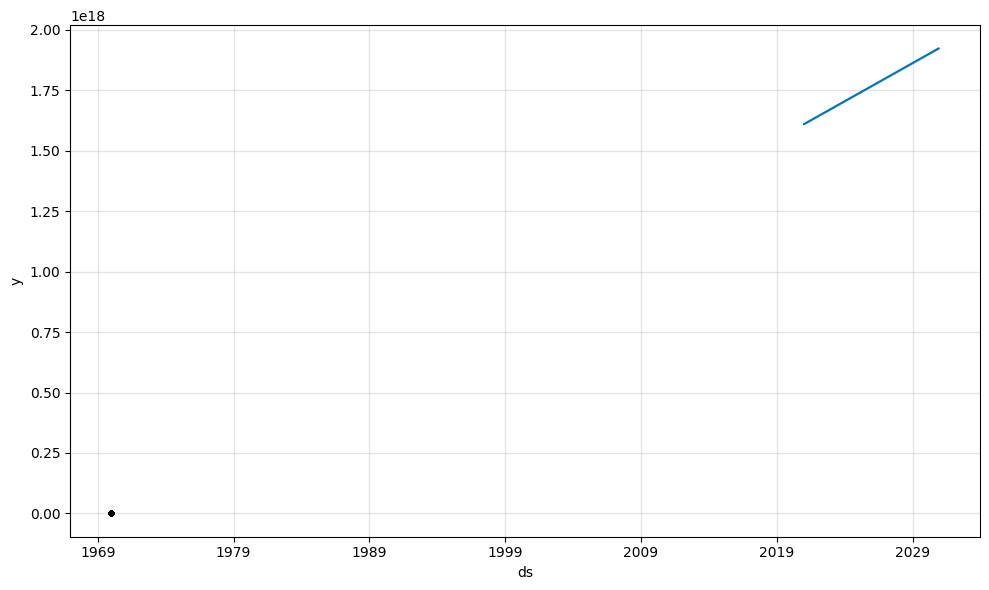

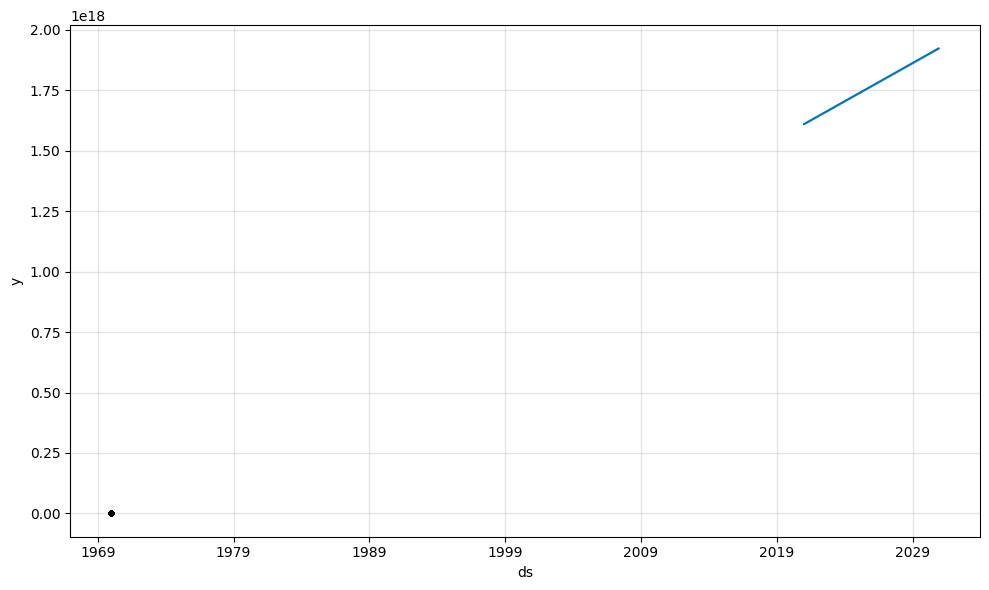

In [195]:
model.plot(forecast)

In [256]:
df= pd.read_csv('sealevel.csv')

In [257]:
df

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21
...,...,...,...,...,...,...,...,...,...
1043,2021,334929.31,49.26,85.01,49.78,56.17,84.76,56.69,60.49
1044,2021,338042.09,50.49,85.94,49.66,57.42,85.65,56.57,60.56
1045,2021,337369.81,49.65,84.02,49.58,56.57,83.78,56.50,60.53
1046,2021,335464.09,47.46,82.66,49.54,54.41,82.45,56.46,60.36


In [258]:
df['Year'].value_counts()

Year
1993    37
1994    37
2019    37
2018    37
2017    37
2016    37
2015    37
2013    37
2012    37
2011    37
2010    37
2009    37
2007    37
2005    37
2004    37
2003    37
2001    37
2000    37
1999    37
1998    37
1997    37
1995    37
2006    36
2008    36
2002    36
2014    36
1996    36
2020    36
2021    18
Name: count, dtype: int64

In [259]:
gr= df.groupby('Year')

In [260]:
gr.groups;

In [261]:
newdf= pd.DataFrame({
    'ds': gr.mean().index,
    'y': gr.mean()['GMSL_noGIA']
})

In [262]:
newdf

,ds,y
Year,,
1993,1993,-34.605405
1994,1994,-30.951081
1995,1995,-28.645946
1996,1996,-26.596389
1997,1997,-22.682432
1998,1998,-25.060541
1999,1999,-21.812432
2000,2000,-18.425405
2001,2001,-13.219189


In [255]:
newdf.columns=['ds','y']

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [265]:
newdf['ds']=pd.to_datetime(newdf['ds'],format='%Y')

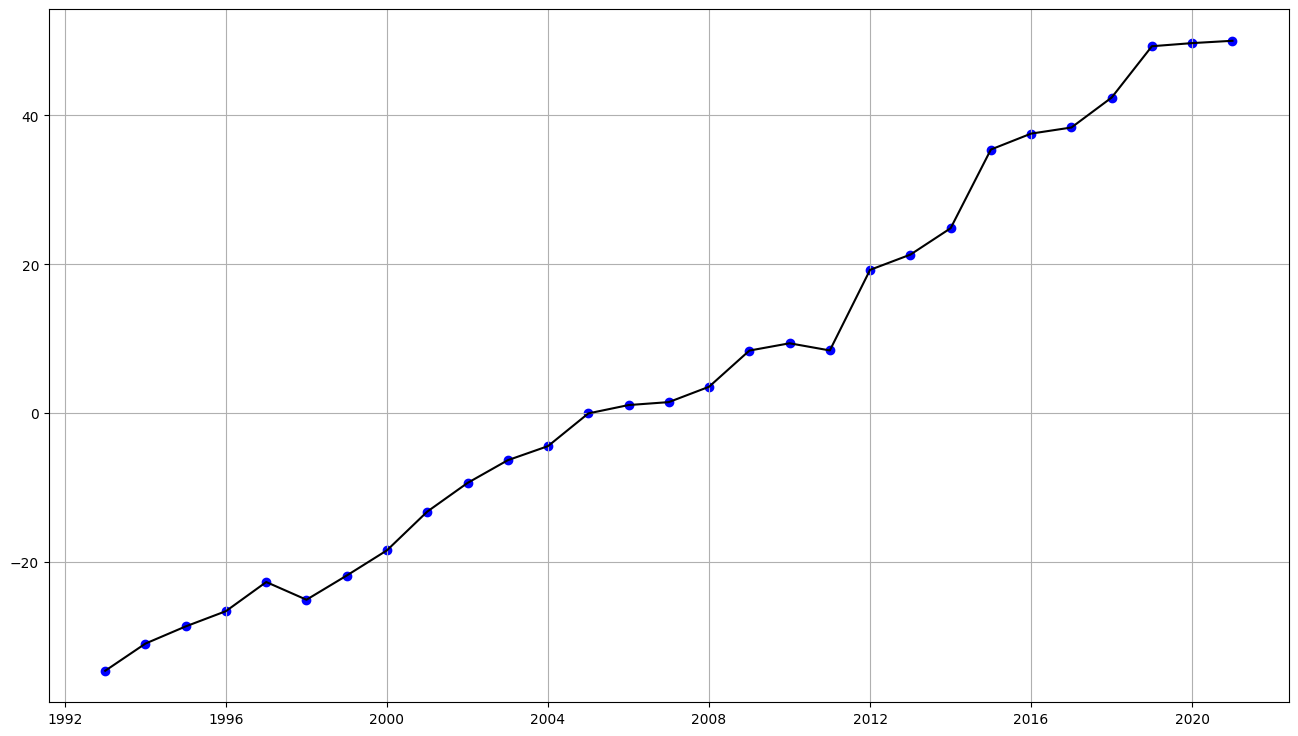

In [266]:
plt.figure(figsize=(16,9))
plt.grid()
plt.scatter(newdf['ds'],newdf['y'],color='b')

plt.plot(newdf['ds'],newdf['y'],color='k')

In [267]:
model = Prophet(daily_seasonality=True, weekly_seasonality=True,
                yearly_seasonality=True)
model.fit(newdf)

12:17:04 - cmdstanpy - INFO - Chain [1] start processing
12:17:04 - cmdstanpy - INFO - Chain [1] done processing


In [268]:
future= list()
for i in range(2022,2031):
    date=str(i)
    future.append([date])

In [269]:
future

[['2022'],
 ['2023'],
 ['2024'],
 ['2025'],
 ['2026'],
 ['2027'],
 ['2028'],
 ['2029'],
 ['2030']]

In [270]:
future=pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'],format='%Y')
future

,ds
0,2022-01-01
1,2023-01-01
2,2024-01-01
3,2025-01-01
4,2026-01-01
5,2027-01-01
6,2028-01-01
7,2029-01-01
8,2030-01-01


In [271]:
forecast=model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,95.777996,45.259673,54.340994,95.777634,95.778270,-45.613280,-45.613280,-45.613280,91.467478,...,-1.737257,-1.737257,-1.737257,-135.343501,-135.343501,-135.343501,0.0,0.0,0.0,50.164716
1,2023-01-01,98.882534,50.911229,59.831182,98.881408,98.883425,-43.419752,-43.419752,-43.419752,91.467478,...,0.520306,0.520306,0.520306,-135.407536,-135.407536,-135.407536,0.0,0.0,0.0,55.462782
2,2024-01-01,101.987071,54.260993,63.114764,101.984978,101.988953,-43.505970,-43.505970,-43.505970,91.467478,...,0.217960,0.217960,0.217960,-135.191407,-135.191407,-135.191407,0.0,0.0,0.0,58.481102
3,2025-01-01,105.100114,58.708624,67.278377,105.096800,105.103086,-42.248919,-42.248919,-42.248919,91.467478,...,1.282956,1.282956,1.282956,-134.999353,-134.999353,-134.999353,0.0,0.0,0.0,62.851195
4,2026-01-01,108.204652,59.740630,68.193184,108.200008,108.208903,-44.180646,-44.180646,-44.180646,91.467478,...,-0.304622,-0.304622,-0.304622,-135.343501,-135.343501,-135.343501,0.0,0.0,0.0,64.024006
5,2027-01-01,111.309189,62.904704,71.662669,111.302962,111.314812,-43.817544,-43.817544,-43.817544,91.467478,...,0.122514,0.122514,0.122514,-135.407536,-135.407536,-135.407536,0.0,0.0,0.0,67.491645
6,2028-01-01,114.413727,64.767478,73.424288,114.405699,114.420855,-45.461186,-45.461186,-45.461186,91.467478,...,-1.737257,-1.737257,-1.737257,-135.191407,-135.191407,-135.191407,0.0,0.0,0.0,68.952540
7,2029-01-01,117.526770,69.661472,78.817170,117.516633,117.536059,-43.313915,-43.313915,-43.313915,91.467478,...,0.217960,0.217960,0.217960,-134.999353,-134.999353,-134.999353,0.0,0.0,0.0,74.212855
8,2030-01-01,120.631307,72.063684,81.045684,120.619115,120.642284,-43.977880,-43.977880,-43.977880,91.467478,...,-0.101856,-0.101856,-0.101856,-135.343501,-135.343501,-135.343501,0.0,0.0,0.0,76.653427


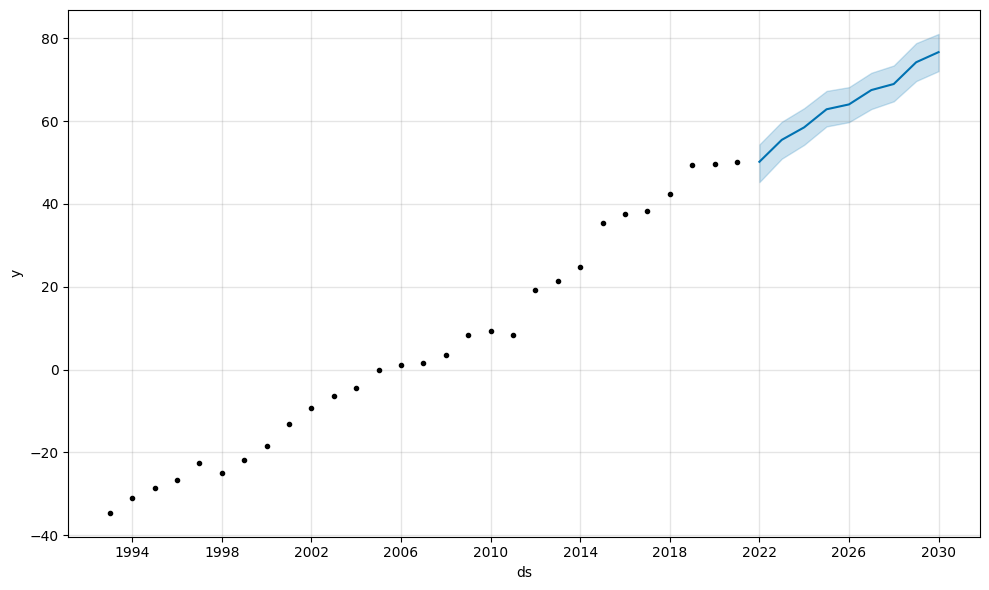

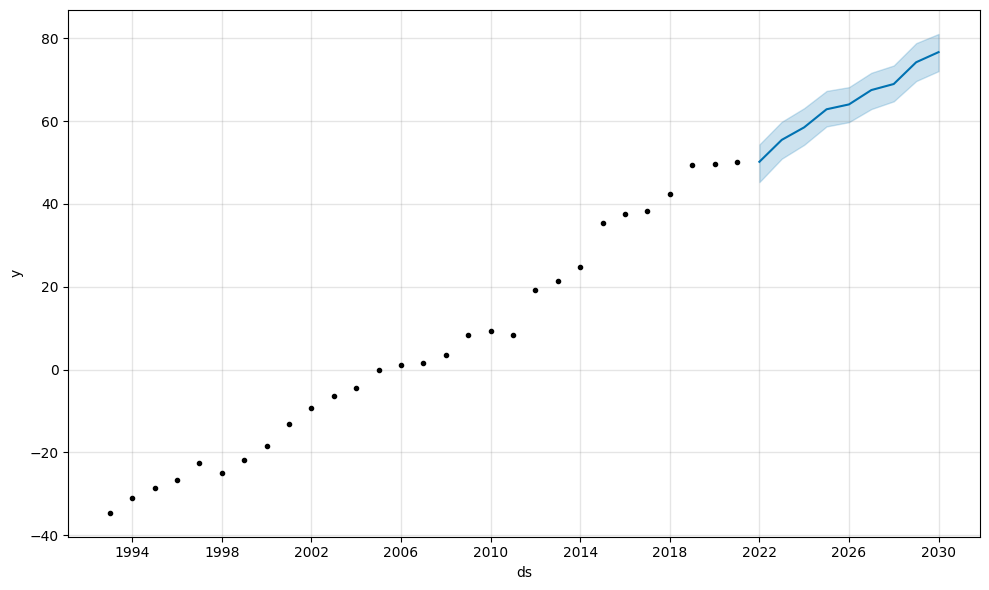

In [272]:
model.plot(forecast)

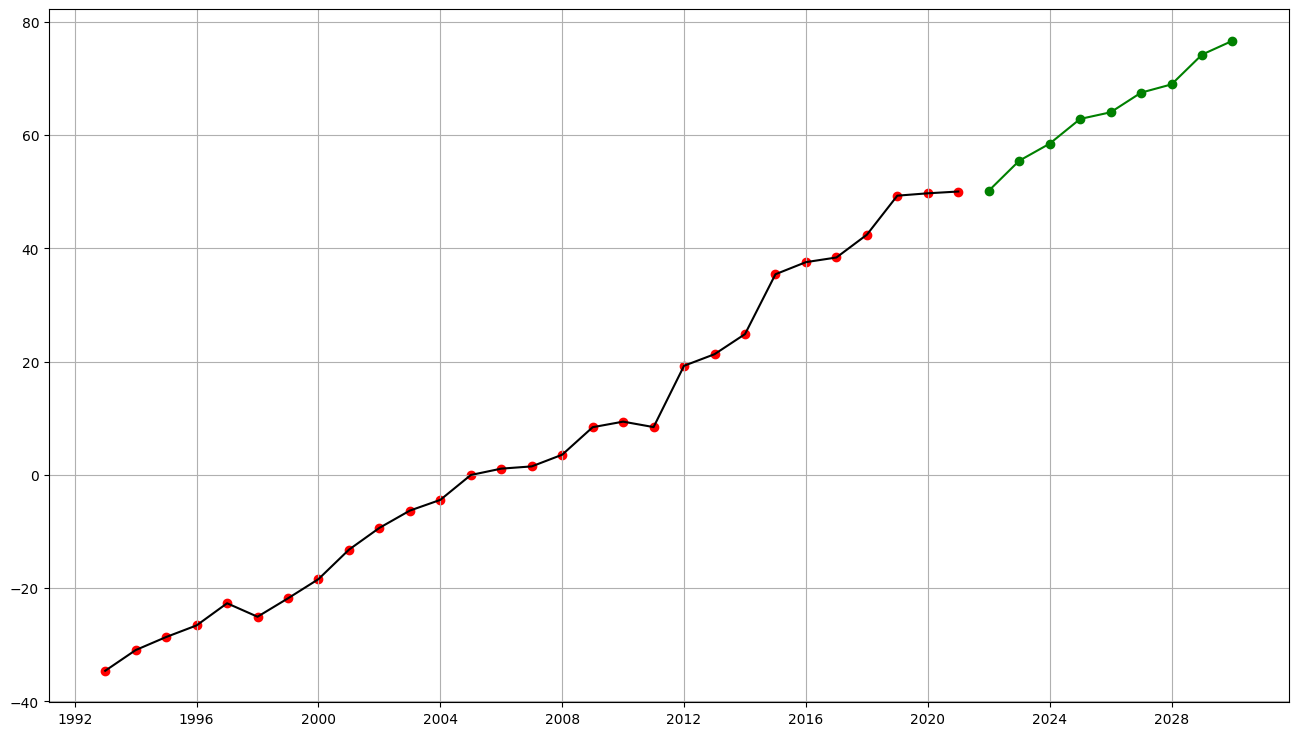

In [274]:
plt.figure(figsize=(16,9))
plt.grid()
plt.scatter(newdf['ds'],newdf['y'],color='r')
plt.plot(newdf['ds'],newdf['y'],color='k')
plt.plot(forecast['ds'],forecast['yhat'],color='g',marker='o')

In [252]:
newdf.dtypes

ds             int64
y            float64
df    datetime64[ns]
dtype: object